In [2]:
#Importamos las librerias pandas, numpy y matplotlib respectivamente
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#Carga desde un archivo .csv sin indice
data= pd.read_csv('Rio.csv') 

In [4]:
#Verificamos información del DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39499 entries, 0 to 39498
Data columns (total 51 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Unnamed: 0                                    39499 non-null  int64  
 1   source                                        39499 non-null  object 
 2   name                                          39499 non-null  object 
 3   host_since                                    39497 non-null  object 
 4   host_location                                 31853 non-null  object 
 5   host_response_time                            35578 non-null  object 
 6   host_response_rate                            35578 non-null  object 
 7   host_acceptance_rate                          35965 non-null  object 
 8   host_is_superhost                             38329 non-null  object 
 9   host_neighbourhood                            33964 non-null 

In [5]:
#Corroboramos valores nulos
valores_nulos=data.isnull().sum()
valores_nulos

Unnamed: 0                                          0
source                                              0
name                                                0
host_since                                          2
host_location                                    7646
host_response_time                               3921
host_response_rate                               3921
host_acceptance_rate                             3534
host_is_superhost                                1170
host_neighbourhood                               5535
host_listings_count                                 2
host_total_listings_count                           2
host_identity_verified                              2
neighbourhood                                   22619
neighbourhood_cleansed                              0
property_type                                       0
room_type                                           0
accommodates                                        0
bathrooms                   

**PROCEDIMIENTO PARA ELIMINAR VALORES NULOS EN DATAFRAME**

In [6]:
#Reemplazamos valores nulos del dataframe con "bfill"
data1 =data.fillna(method="bfill") 
data1 =data.fillna(method="ffill") 

/var/folders/g2/ww78rm_s75z1d2tynldmz1_m0000gn/T/ipykernel_7060/3829910909.py:2: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1 =data.fillna(method="bfill")
/var/folders/g2/ww78rm_s75z1d2tynldmz1_m0000gn/T/ipykernel_7060/3829910909.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data1 =data.fillna(method="ffill")


In [7]:
#Corroboramos valores nulos del dataframe
valores_nulos=data1.isnull().sum()
valores_nulos

Unnamed: 0                                      0
source                                          0
name                                            0
host_since                                      0
host_location                                   0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_neighbourhood                              0
host_listings_count                             0
host_total_listings_count                       0
host_identity_verified                          0
neighbourhood                                   0
neighbourhood_cleansed                          0
property_type                                   0
room_type                                       0
accommodates                                    0
bathrooms                                       0
bedrooms                                        0


In [8]:
#Creo 2 dataframe para poder procesar los outliers
cuantitativas= data1.iloc[ : , [10,11,17,18,19,20,22,23,24,25,26,27,29,30,31,32,33,34,35,38,39,40,41,42,43,44,46,47,48,49,50]]
cualitativas= data1.iloc[ : , [0,1,2,3,4,5,6,7,8,9,12,13,14,15,16,21,28,36,37] ]

<Figure size 1500x800 with 0 Axes>

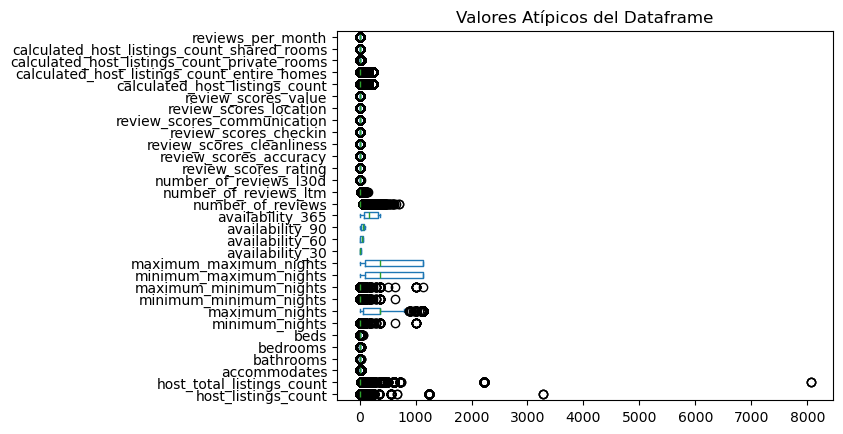

In [9]:
#Realizamos diagrama de caja o bigote de cada columna del dataframe
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show() #dibujamos el diagrama

**PROCEDIMIENTO "CUANTILES" PARA SUSTITUIR OUTLIERS EN DATAFRAME**

In [10]:
#Método aplicando Cuartiles. Encuentro cuartiles 0.25 y 0.75
y=cuantitativas

percentile25=y.quantile(0.25) #Q1
percentile75=y.quantile(0.75) #Q3
iqr= percentile75 - percentile25

Limite_Superior_iqr= percentile75 + 1.5*iqr
Limite_Inferior_iqr= percentile25 - 1.5*iqr
print("Limite superior permitido", Limite_Superior_iqr)
print("Limite inferior permitido", Limite_Inferior_iqr)

Limite superior permitido host_listings_count                               13.500
host_total_listings_count                         21.000
accommodates                                       9.500
bathrooms                                          3.500
bedrooms                                           3.500
beds                                               6.000
minimum_nights                                     6.000
maximum_nights                                   822.500
minimum_minimum_nights                             6.000
maximum_minimum_nights                             9.500
minimum_maximum_nights                          2679.000
maximum_maximum_nights                          2677.500
availability_30                                   55.500
availability_60                                  114.000
availability_90                                  159.000
availability_365                                 698.000
number_of_reviews                                 62.500
numbe

In [11]:
#Obtenemos datos limpios del Dataframe
data3_iqr= cuantitativas[(y<=Limite_Superior_iqr)&(y>=Limite_Inferior_iqr)]
data3_iqr

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.0,3.0,4.0,1.0,2.0,2.0,1.0,90.0,1.0,1.0,...,NaN,NaN,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.05
1,3.0,3.0,4.0,1.0,1.0,1.0,3.0,29.0,1.0,5.0,...,4.87,4.97,4.97,4.97,4.86,2.0,2.0,0.0,0.0,2.31
2,6.0,6.0,2.0,1.0,1.0,2.0,2.0,30.0,2.0,4.0,...,4.94,4.94,5.00,4.97,4.94,5.0,3.0,2.0,0.0,0.25
3,1.0,2.0,6.0,3.5,3.0,3.0,2.0,7.0,2.0,2.0,...,4.94,4.94,5.00,4.97,4.94,1.0,1.0,0.0,0.0,0.25
4,5.0,6.0,1.0,1.0,1.0,1.0,NaN,200.0,NaN,NaN,...,5.00,5.00,5.00,NaN,4.80,5.0,0.0,NaN,0.0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39494,NaN,NaN,4.0,2.0,1.0,2.0,1.0,90.0,1.0,5.0,...,5.00,5.00,5.00,5.00,5.00,NaN,NaN,0.0,0.0,2.00
39495,1.0,1.0,8.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,2.00
39496,1.0,1.0,6.0,1.0,1.0,4.0,2.0,365.0,2.0,2.0,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,2.00
39497,1.0,1.0,6.0,1.5,2.0,1.0,2.0,15.0,2.0,2.0,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,2.00


In [12]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=data3_iqr.isnull().sum()
valores_nulos

host_listings_count                             6562
host_total_listings_count                       5974
accommodates                                    1339
bathrooms                                       1204
bedrooms                                        1411
beds                                            1019
minimum_nights                                  2273
maximum_nights                                  7415
minimum_minimum_nights                          1961
maximum_minimum_nights                          1738
minimum_maximum_nights                             0
maximum_maximum_nights                             0
availability_30                                    0
availability_60                                    0
availability_90                                    0
availability_365                                   0
number_of_reviews                               4240
number_of_reviews_ltm                           3522
number_of_reviews_l30d                        

In [13]:
#Reemplazamos valores atípicos (nulos) del dataframe con "mean"
#Realizamos una copia del dataframe
data4_iqr=data3_iqr.copy()
data4_iqr=data4_iqr.fillna(round(data3_iqr.mean(),1))
data4_iqr

,host_listings_count,host_total_listings_count,accommodates,bathrooms,bedrooms,beds,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,1.0,3.0,4.0,1.0,2.0,2.0,1.0,90.0,1.0,1.0,...,4.90,5.00,5.00,4.90,4.80,1.0,1.0,0.0,0.0,0.05
1,3.0,3.0,4.0,1.0,1.0,1.0,3.0,29.0,1.0,5.0,...,4.87,4.97,4.97,4.97,4.86,2.0,2.0,0.0,0.0,2.31
2,6.0,6.0,2.0,1.0,1.0,2.0,2.0,30.0,2.0,4.0,...,4.94,4.94,5.00,4.97,4.94,5.0,3.0,2.0,0.0,0.25
3,1.0,2.0,6.0,3.5,3.0,3.0,2.0,7.0,2.0,2.0,...,4.94,4.94,5.00,4.97,4.94,1.0,1.0,0.0,0.0,0.25
4,5.0,6.0,1.0,1.0,1.0,1.0,2.3,200.0,2.1,3.4,...,5.00,5.00,5.00,4.90,4.80,5.0,0.0,0.3,0.0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39494,2.7,3.9,4.0,2.0,1.0,2.0,1.0,90.0,1.0,5.0,...,5.00,5.00,5.00,5.00,5.00,2.4,1.6,0.0,0.0,2.00
39495,1.0,1.0,8.0,1.0,1.0,1.0,1.0,365.0,1.0,1.0,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,2.00
39496,1.0,1.0,6.0,1.0,1.0,4.0,2.0,365.0,2.0,2.0,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,2.00
39497,1.0,1.0,6.0,1.5,2.0,1.0,2.0,15.0,2.0,2.0,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,2.00


In [14]:
# Unimos el dataframe cuantitativo limpio con el dataframe cualitativo

Datos_limpios = pd.concat([cualitativas, data4_iqr], axis=1)
Datos_limpios

,Unnamed: 0,source,name,host_since,host_location,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,0,city scrape,Unbelievable Ocean View Apartment,2011-11-19,"Rio de Janeiro, Brazil",a few days or more,0%,0%,f,Vidigal,...,4.90,5.00,5.00,4.90,4.80,1.0,1.0,0.0,0.0,0.05
1,1,city scrape,EXCELENTE APARTAMENTO EM COPACABANA,2013-07-15,"Rio de Janeiro, Brazil",a few days or more,0%,0%,f,Vidigal,...,4.87,4.97,4.97,4.97,4.86,2.0,2.0,0.0,0.0,2.31
2,2,city scrape,Comfort em Copacabana,2011-11-20,"Rio de Janeiro, Brazil",within an hour,100%,100%,t,Copacabana,...,4.94,4.94,5.00,4.97,4.94,5.0,3.0,2.0,0.0,0.25
3,3,city scrape,Amazing Huge Apartment in Leblon,2011-04-25,"Rio de Janeiro, Brazil",within an hour,100%,100%,f,Leblon,...,4.94,4.94,5.00,4.97,4.94,1.0,1.0,0.0,0.0,0.25
4,4,city scrape,Lindo quarto sossegado para temporada,2011-05-04,"Rio de Janeiro, Brazil",within a few hours,100%,20%,f,Santa Teresa,...,5.00,5.00,5.00,4.90,4.80,5.0,0.0,0.3,0.0,0.04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39494,39494,city scrape,Copa Reformado 1 qrt perto do metrô,2014-06-27,"Rio de Janeiro, Brazil",within an hour,100%,99%,f,Copacabana,...,5.00,5.00,5.00,5.00,5.00,2.4,1.6,0.0,0.0,2.00
39495,39495,city scrape,Casa Sabiá,2022-08-24,"Rio de Janeiro, Brazil",within an hour,100%,99%,f,Cachambi,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,2.00
39496,39496,city scrape,Apartamento na Barata Ribeiro - Copacabana,2020-03-07,"State of Rio de Janeiro, Brazil",within an hour,100%,100%,f,Copacabana,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,2.00
39497,39497,city scrape,No coração de Ipanema…,2016-04-14,"State of Rio de Janeiro, Brazil",within an hour,100%,100%,f,Ipanema,...,5.00,5.00,5.00,5.00,5.00,1.0,1.0,0.0,0.0,2.00


In [15]:
#Corroboramos valores nulos del dataframe LIMPIO
valores_nulos=Datos_limpios.isnull().sum()
valores_nulos

Unnamed: 0                                      0
source                                          0
name                                            0
host_since                                      0
host_location                                   0
host_response_time                              0
host_response_rate                              0
host_acceptance_rate                            0
host_is_superhost                               0
host_neighbourhood                              0
host_identity_verified                          0
neighbourhood                                   0
neighbourhood_cleansed                          0
property_type                                   0
room_type                                       0
price                                           0
has_availability                                0
first_review                                    0
last_review                                     0
host_listings_count                             0


In [16]:
#Convertir DataFrame a CSV
Datos_limpios.to_csv("Rio_outliers.csv")